In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
automobile_df.sample(5)
#mpg is meter per galon = what we predict

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
67,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
334,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs
48,18.0,6,250.0,88,3139,14.5,71,1,ford mustang
128,15.0,6,250.0,100,3336,17.0,74,1,chevrolet nova
295,35.7,4,98.0,80,1915,14.4,79,1,dodge colt hatchback custom


In [3]:
automobile_df = automobile_df.replace('?', np.nan)
#replace ? with nan

In [4]:
#clean missing field
automobile_df = automobile_df.dropna()

In [5]:
automobile_df.shape

(392, 9)

In [6]:
#drop unused field
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [8]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [9]:
#convert model year into 19** form
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [10]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
367,28.0,4,112.0,88,2605,19.6,1982
284,20.6,6,225.0,110,3360,16.6,1979
197,29.0,4,90.0,70,1937,14.2,1976
147,24.0,4,90.0,75,2108,15.5,1974
273,23.9,4,119.0,97,2405,14.9,1978


In [13]:
#age field is substract from current year
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])
automobile_df.drop(['model year'], axis=1, inplace=True)

In [14]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
272,23.8,4,151.0,85,2855,17.6,42
75,14.0,8,318.0,150,4077,14.0,48
190,14.5,8,351.0,152,4215,12.8,44
125,20.0,6,198.0,95,3102,16.5,46
377,31.0,4,91.0,68,1970,17.6,38


In [15]:
#all field must be numeric. but horse power is object
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [16]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [17]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

In [19]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


Text(0, 0.5, 'Miles per Gallon')

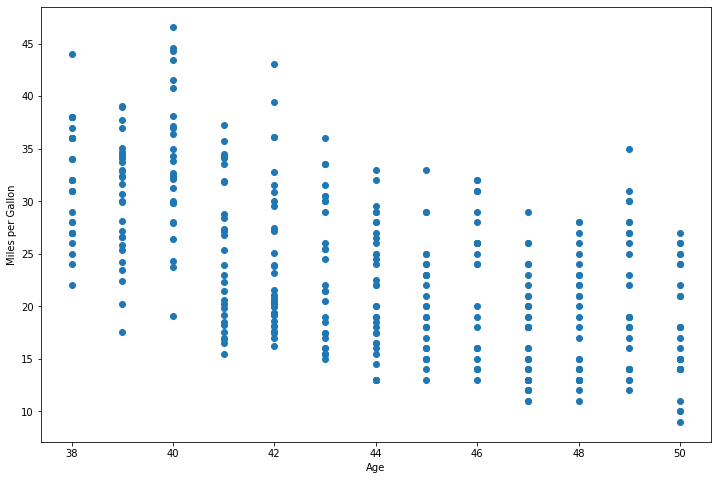

In [20]:
#use scatter plot to view pairwise relationship
#you can see older car means lower miles per gallon
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['age'], automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

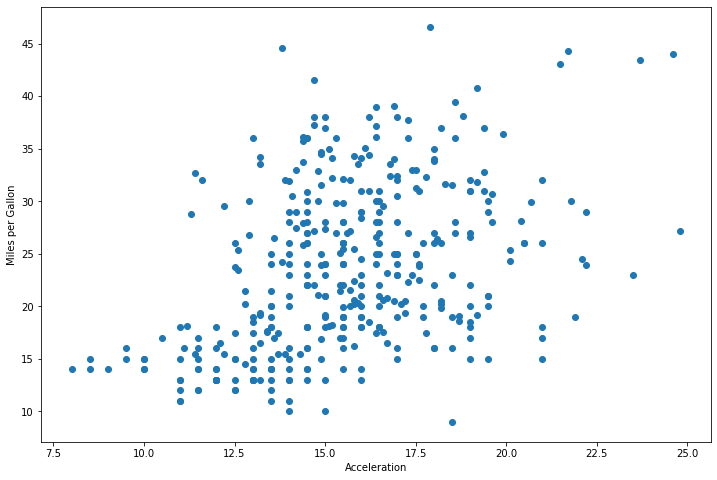

In [21]:
#Acceleration vs MPG
#see higher acc = higher mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

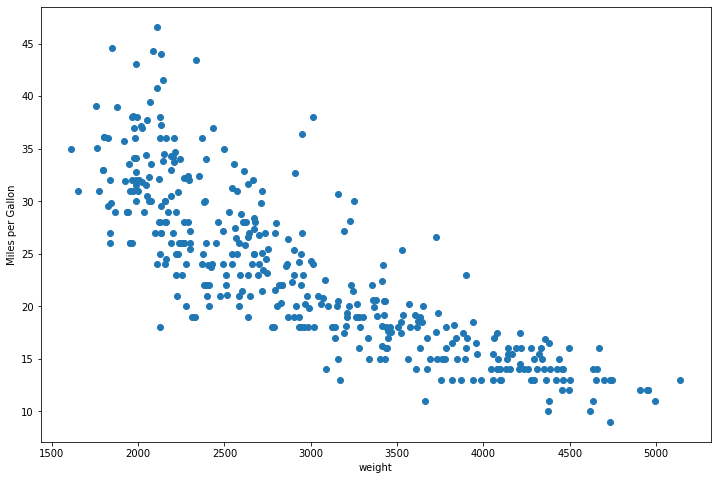

In [22]:
#Weight vs MPG
#see higher weight = lower mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['weight'], automobile_df['mpg'])
plt.xlabel('weight')
plt.ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

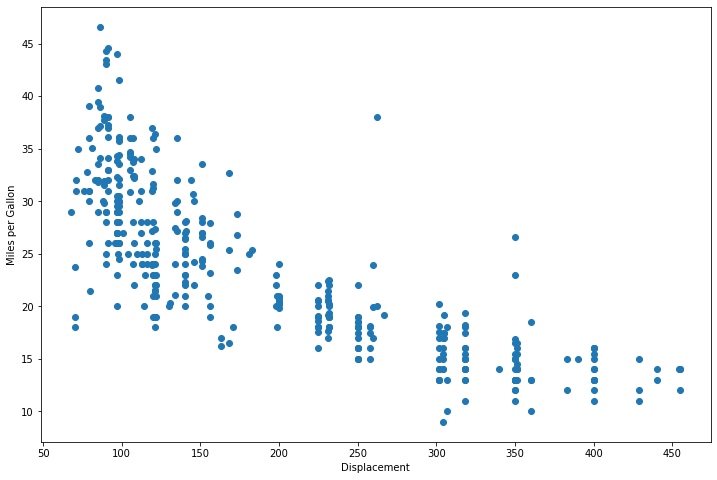

In [23]:
#displacement relative to ground
#displacement vs MPG
#see higher displacement = lower mpg, mobil sedan lebih irit
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['displacement'], automobile_df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

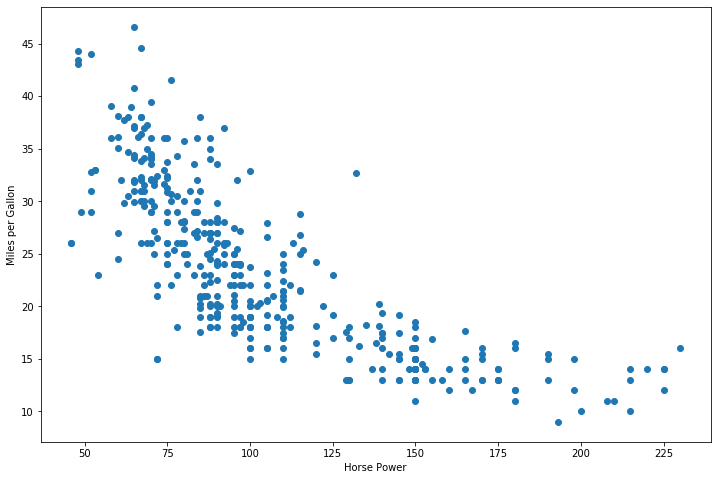

In [24]:
#horse power vs mpg
#makin besar HP, makin boros/ mpg turun.
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])
plt.xlabel('Horse Power')
plt.ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

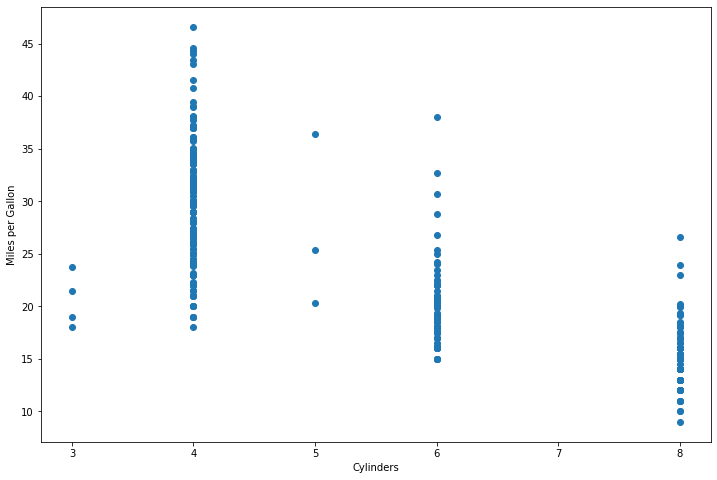

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('Miles per Gallon')
#4 cylinders perform better

In [27]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


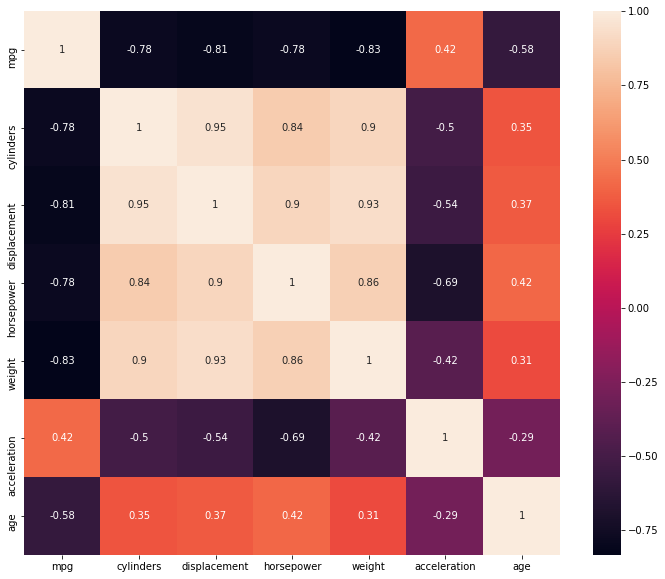

In [28]:
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(automobile_corr, annot=True)

In [29]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,20.0,4,130.0,102,3150,15.7,44
1,15.0,6,250.0,100,3336,17.0,46
2,14.0,8,440.0,215,4312,8.5,50
3,26.0,4,97.0,46,1950,21.0,47
4,26.4,4,140.0,88,2870,18.1,40


In [30]:
#export  to new CSV
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)